In [6]:
# do relevant imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [7]:
# sobel x and sobel y
def abs_sobel_thresh(img, orient, sobel_kernel=3, thresh=(0, 255)):

    if orient == 'x':
        sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
        abs_sobel = np.absolute(sobelx)

    elif orient == 'y':
        sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
        abs_sobel = np.absolute(sobely)

    else:
        sobelx = sobely = abs_sobel = 0

    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    binary = np.zeros_like(scaled_sobel)
    binary[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1

    return binary

In [8]:
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):

    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)

    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobely = np.absolute(sobely)

    mag = np.sqrt(abs_sobelx*abs_sobelx + abs_sobely*abs_sobely)
    scaled_mag = np.uint8(255 * mag / np.max(mag))

    binary = np.zeros_like(scaled_mag)
    binary[(scaled_mag >= mag_thresh[0]) & (scaled_mag <= mag_thresh[1])] = 1

    return binary

In [9]:
def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):

    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    abs_sobelx = np.absolute(sobelx)

    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    abs_sobely = np.absolute(sobely)

    dir = np.arctan2(abs_sobely, abs_sobelx)
    binary = np.zeros_like(dir)
    binary[(dir > thresh[0]) & (dir < thresh[1])] = 1

    return binary

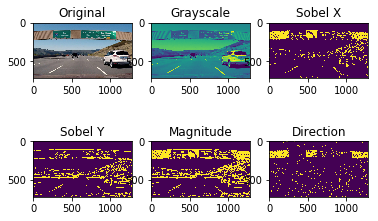

In [10]:
# load image
img = mpimg.imread('test-image.jpg')
plt.subplot(231)
plt.gca().set_title('Original')
plt.imshow(img)

# convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.subplot(232)
plt.gca().set_title('Grayscale')
plt.imshow(gray)

# find gradient of the grayscale image in x direction
gradx = abs_sobel_thresh(gray, 'x', sobel_kernel = 3, thresh=(10, 100))
plt.subplot(233)
plt.gca().set_title('Sobel X')
plt.imshow(gradx)

# find gradient of grayscale image in y direction
grady = abs_sobel_thresh(gray, 'y', sobel_kernel = 3, thresh=(10, 100))
plt.subplot(234)
plt.gca().set_title('Sobel Y')
plt.imshow(grady)

# find the magnitude of the gradient
mag = mag_thresh(gray, sobel_kernel = 3, mag_thresh = (10, 100))
plt.subplot(235)
plt.gca().set_title('Magnitude')
plt.imshow(mag)

# find the direction of the gradient and apply threshold
dir = dir_threshold(gray, sobel_kernel=3, thresh=(0, np.pi/16))
plt.subplot(236)
plt.gca().set_title('Direction')
plt.imshow(dir)

plt.show()